In [178]:
import pandas as pd;
import numpy as np;

df = pd.read_csv('spam.csv', encoding='latin')
print(df.sample(5));

        v1                                                 v2 Unnamed: 2  \
3488   ham                             I'm also came to room.        NaN   
5285  spam  URGENT! You have won a 1 week FREE membership ...        NaN   
2622   ham                                          Ok lor...        NaN   
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...        NaN   
4825   ham                      Haha, just what I was thinkin        NaN   

     Unnamed: 3 Unnamed: 4  
3488        NaN        NaN  
5285        NaN        NaN  
2622        NaN        NaN  
5540        NaN        NaN  
4825        NaN        NaN  


In [179]:
print(df.shape);

(5572, 5)


Process we use

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Model saving into pickle file

1. Data Cleaning

In [180]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [181]:
#droping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True);
print(df.sample(5))

       v1                                                 v2
3282  ham                  Hey tmr maybe can meet you at yck
4566  ham  But you were together so you should be thinkin...
5320  ham               But we havent got da topic yet rite?
4719  ham  Forgot to tell Ì_ smth.. Can Ì_ like number th...
195   ham                       Gud mrng dear hav a nice day


In [182]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True);
print(df.sample(5))

     target                                               text
874     ham  Talk With Yourself Atleast Once In A Day...!!!...
3957    ham         So i could kiss and feel you next to me...
4569   spam  Wanna have a laugh? Try CHIT-CHAT on your mobi...
3019    ham  I thank you so much for all you do with selfle...
2588    ham  My superior telling that friday is leave for a...


In [183]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder();
df['target']=encoder.fit_transform(df['target'])
print(df.sample(5))

      target                                               text
2851       0                         how tall are you princess?
970        0  Yar lor he wan 2 go c horse racing today mah, ...
3113       0  Yes watching footie but worried we're going to...
2490       0  Dun b sad.. It's over.. Dun thk abt it already...
4642       0                        Sorry i din lock my keypad.


In [184]:
print(df.isnull().sum())

target    0
text      0
dtype: int64


In [185]:
print(df.duplicated().sum())

403


In [186]:
df = df.drop_duplicates(keep='first')

In [187]:
df.duplicated().sum()

0

In [188]:
df.shape

(5169, 2)

2. EDA

In [189]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [190]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [191]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhaab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhaab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

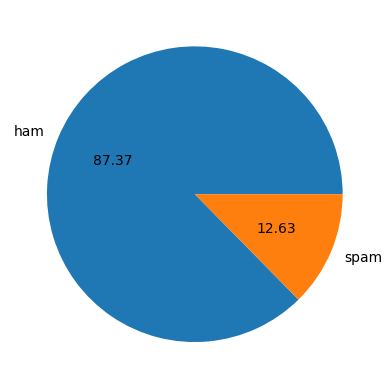

In [192]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show();

In [193]:
df['text_characters'] = df['text'].apply(len)
df.head()

,target,text,text_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [194]:
df['text_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,text_characters,text_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [195]:
df['text_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,text_characters,text_words,text_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [196]:
df[['text_characters','text_words','text_sentence']].describe()

,text_characters,text_words,text_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [197]:
#ham
df[df['target']==0][['text_characters','text_words','text_sentence']].describe()

,text_characters,text_words,text_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [198]:
#spam
df[df['target']==1][['text_characters','text_words','text_sentence']].describe()

,text_characters,text_words,text_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='text_characters', ylabel='Count'>

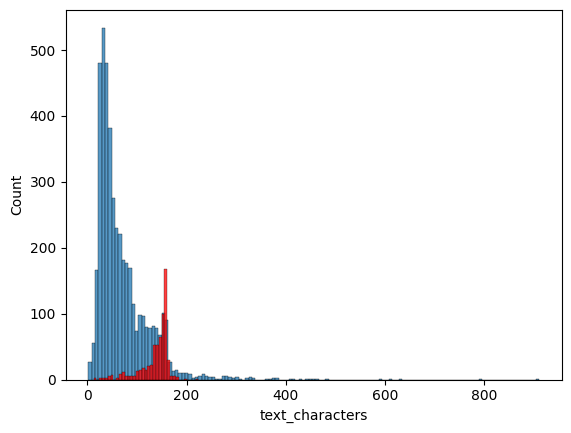

In [199]:
import seaborn as sns
#ham
sns.histplot(df[df['target']==0]['text_characters'])
#spam
sns.histplot(df[df['target']==1]['text_characters'],color='red')

<AxesSubplot:xlabel='text_words', ylabel='Count'>

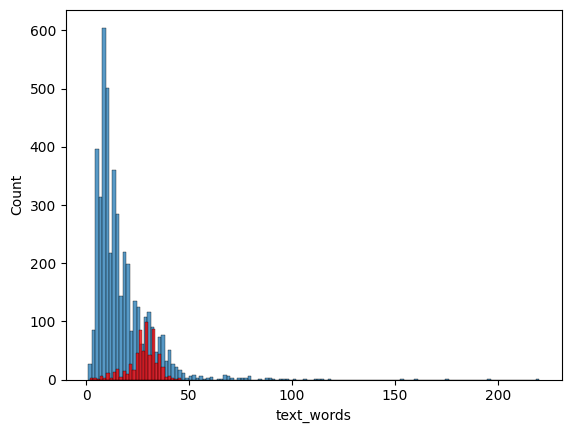

In [200]:
#ham
sns.histplot(df[df['target']==0]['text_words'])
#spam
sns.histplot(df[df['target']==1]['text_words'],color='red')

<AxesSubplot:xlabel='text_sentence', ylabel='Count'>

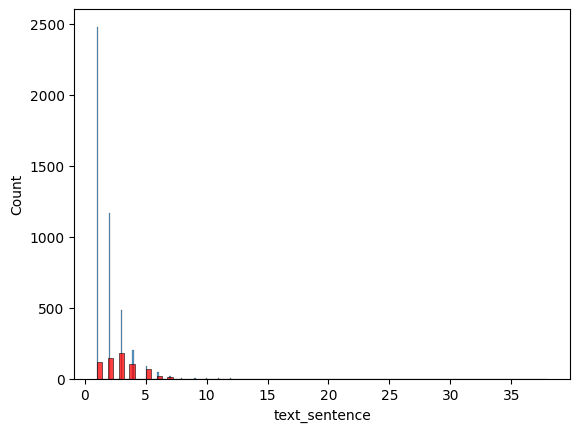

In [201]:
#ham
sns.histplot(df[df['target']==0]['text_sentence'])
#spam
sns.histplot(df[df['target']==1]['text_sentence'],color='red')

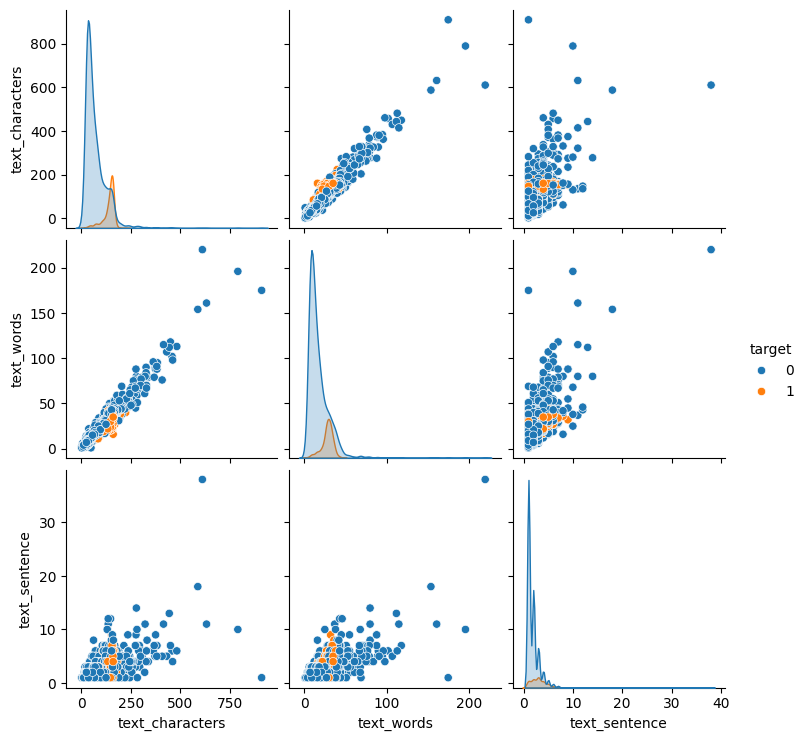

In [202]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

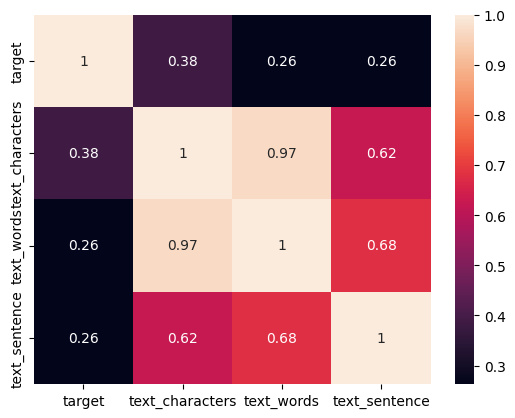

In [203]:
sns.heatmap(df.corr(),annot=True)

3. Text Preprocessing


    a. Lower Case
    b. Tokenization
    c. Removing Special Characters
    d. Removing Punctuation and stop words
    e. Stemming

In [204]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
def text_transformation(text):
    #lower case
    text = text.lower();

    # tokenization
    text = nltk.word_tokenize(text);
    
    #Removing Special Characters
    y = [];
    for i in text:
        if i.isalnum():
            y.append(i);
    text  = y[:];
    y.clear();

    #Removing Punctuation and stop words
    for i in text:
        if i  not in stopwords.words('english') and i not in string.punctuation:
            y.append(i);
    text = y[:];
    y.clear();

    #Stemming
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i));
    text = ' '.join(y);
    y.clear();

    return text;


In [205]:
df['transform_text'] = df['text'].apply(lambda x: text_transformation(x))
df.head()

,target,text,text_characters,text_words,text_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4. Model Building

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=3000);

In [274]:
X = tfid.fit_transform(df['transform_text']).toarray()
Y = df['target']

In [275]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=2)

5. Evaluation

In [276]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score

In [277]:
gnb = GaussianNB();
bnb = BernoulliNB();
mnb = MultinomialNB();
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [278]:
clfs = {
    'GNB':gnb,
    'BNB':bnb,
    'MNB':mnb,
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [290]:
def showModelPerformance():
    accuracyScores = [];
    precisionScores = [];
    for clf in clfs.values():
        clf.fit(x_train,y_train);
        y_pred = clf.predict(x_test);
        accuracyScores.append(accuracy_score(y_test,y_pred));
        precisionScores.append(precision_score(y_test,y_pred));
    performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracyScores,'Precision':precisionScores})
    return performance_df;

performance_df = showModelPerformance()

In [292]:
performance_df

,Algorithm,Accuracy,Precision
0,GNB,0.869439,0.506849
1,BNB,0.983559,0.991870
2,MNB,0.970986,1.000000
3,SVC,0.972921,0.982456
4,KN,0.905222,1.000000
5,NB,0.970986,1.000000
6,DT,0.927466,0.811881
7,LR,0.956480,0.979381
8,RF,0.975822,0.982906
9,AdaBoost,0.960348,0.929204


6. Improvement

In [296]:
def predict_spam(input_sms):
    # 1. preprocess
    transformed_sms = text_transformation(input_sms)
    # 2. vectorize
    vector_input = tfid.transform([transformed_sms])
    # 3. predict
    result = mnb.predict(vector_input)[0]
    return result;

7. Model Saving into Pickle file

In [300]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'));
pickle.dump(mnb,open('model.pkl','wb'));
print('Successfully created the file.')

Successfully created the file.
